In [1]:
#import pandas as pd
#import seaborn as sns

import numpy as np
import cv2 ##pip install opencv-python
import PIL.Image as Image #pip install pillow
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from skimage import io #pip install scikit-image
import pathlib

from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report, accuracy_score, classification_report
#rom sklearn.metrics import RocCurveDisplay

**Loading Data From the Local Folders**

In [2]:
data_dir_train = "N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/train"
data_dir_train = pathlib.Path(data_dir_train)
data_dir_train

WindowsPath('N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/train')

In [3]:
data_dir_test = "N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/test"
data_dir_test = pathlib.Path(data_dir_test)
data_dir_test

WindowsPath('N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/test')

In [4]:
data_dir_val = "N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/val"
data_dir_val = pathlib.Path(data_dir_val)
data_dir_val

WindowsPath('N:/ML Project/Tomato village/Variant-a(Multiclass Classification)/val')

In [5]:
# Create a dictionary to hold image paths for each class
image_dic_train = {
    'Early_blight': list(data_dir_train.glob('Early_blight/*')),
    'Healthy': list(data_dir_train.glob('Healthy/*')),
    'Late_blight': list(data_dir_train.glob('Late_blight/*')),
    'Leaf_Miner': list(data_dir_train.glob('Leaf_Miner/*')),
    'Magnesium_Deficiency': list(data_dir_train.glob('Magnesium_Deficiency/*')),
    'Nitrogen_Deficiency': list(data_dir_train.glob('Nitrogen_Deficiency/*')),
    'Pottassium_Deficiency': list(data_dir_train.glob('Pottassium_Deficiency/*')),
    'Spotted_Wilt_Virus': list(data_dir_train.glob('Spotted_Wilt_Virus/*'))
}

In [6]:
image_dic_test={
    'Early_blight': list(data_dir_test.glob('Early_blight/*')),
    'Healthy': list(data_dir_test.glob('Healthy/*')),
    'Late_blight': list(data_dir_test.glob('Late_blight/*')),
    'Leaf_Miner': list(data_dir_test.glob('Leaf_Miner/*')), 
    'Magnesium_Deficiency': list(data_dir_test.glob('Magnesium_Deficiency/*')), 
    'Nitrogen_Deficiency': list(data_dir_test.glob('Nitrogen_Deficiency/*')), 
    'Pottassium_Deficiency': list(data_dir_test.glob('Pottassium_Deficiency/*')),
    'Spotted_Wilt_Virus': list(data_dir_test.glob('Spotted_Wilt_Virus/*'))
}

In [7]:
image_dic_val={
    'Early_blight': list(data_dir_val.glob('Early_blight/*')),
    'Healthy': list(data_dir_val.glob('Healthy/*')),
    'Late_blight': list(data_dir_val.glob('Late_blight/*')),
    'Leaf_Miner': list(data_dir_val.glob('Leaf_Miner/*')), 
    'Magnesium_Deficiency': list(data_dir_val.glob('Magnesium_Deficiency/*')), 
    'Nitrogen_Deficiency': list(data_dir_val.glob('Nitrogen_Deficiency/*')), 
    'Pottassium_Deficiency': list(data_dir_val.glob('Pottassium_Deficiency/*')),
    'Spotted_Wilt_Virus': list(data_dir_val.glob('Spotted_Wilt_Virus/*'))
}

In [8]:
image_labels={
    'Early_blight': 0,
    'Healthy': 1,
    'Late_blight': 2,
    'Leaf_Miner': 3, 
    'Magnesium_Deficiency': 4, 
    'Nitrogen_Deficiency': 5, 
    'Pottassium_Deficiency': 6,
    'Spotted_Wilt_Virus':7
}

In [9]:
# Print the number of images in each class
print(len(image_dic_train['Early_blight']))
print(len(image_dic_train['Healthy']))
print(len(image_dic_train['Late_blight']))
print(len(image_dic_train['Leaf_Miner']))
print(len(image_dic_train['Magnesium_Deficiency']))
print(len(image_dic_train['Nitrogen_Deficiency']))
print(len(image_dic_train['Pottassium_Deficiency']))
print(len(image_dic_train['Spotted_Wilt_Virus']))

347
151
632
716
654
251
50
361


In [10]:
# Print the number of images in each class
print(len(image_dic_test['Early_blight']))
print(len(image_dic_test['Healthy']))
print(len(image_dic_test['Late_blight']))
print(len(image_dic_test['Leaf_Miner']))
print(len(image_dic_test['Magnesium_Deficiency']))
print(len(image_dic_test['Nitrogen_Deficiency']))
print(len(image_dic_test['Pottassium_Deficiency']))
print(len(image_dic_test['Spotted_Wilt_Virus']))


50
22
92
104
95
37
8
53


In [11]:
# Print the number of images in each class
print(len(image_dic_val['Early_blight']))
print(len(image_dic_val['Healthy']))
print(len(image_dic_val['Late_blight']))
print(len(image_dic_val['Leaf_Miner']))
print(len(image_dic_val['Magnesium_Deficiency']))
print(len(image_dic_val['Nitrogen_Deficiency']))
print(len(image_dic_val['Pottassium_Deficiency']))
print(len(image_dic_val['Spotted_Wilt_Virus']))

99
43
180
204
187
72
14
103


In [12]:
X_train, y_train = [], []

for image_name, images in image_dic_train.items():
    for image in images:
        img_array = cv2.imread(str(image))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(RGB_img,(224,224))
        X_train.append(resized_img)
        y_train.append(image_labels[image_name])
        
X_test, y_test = [], []

for image_name, images in image_dic_test.items():
    for image in images:
        img_array = cv2.imread(str(image))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(RGB_img,(224,224))
        X_test.append(resized_img)
        y_test.append(image_labels[image_name])


X_val, y_val = [], []

for image_name, images in image_dic_val.items():
    for image in images:
        img_array = cv2.imread(str(image))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(RGB_img,(224,224))
        X_val.append(resized_img)
        y_val.append(image_labels[image_name])

**Converting into Numpy Array**

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [14]:
X_train.shape, y_train.shape

((3162, 224, 224, 3), (3162,))

In [15]:
#Identify class distribution
unique_classes, class_counts = np.unique(y_train, return_counts=True)

dict(zip(unique_classes, class_counts))

{0: 347, 1: 151, 2: 632, 3: 716, 4: 654, 5: 251, 6: 50, 7: 361}

In [16]:
majority_count = max(class_counts)
majority_count

716

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Class Distribution Before Oversampling:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} images")
print(f"Majority class has {majority_count} images.\n")


Class Distribution Before Oversampling:
Class 0: 347 images
Class 1: 151 images
Class 2: 632 images
Class 3: 716 images
Class 4: 654 images
Class 5: 251 images
Class 6: 50 images
Class 7: 361 images
Majority class has 716 images.



**Balancing Data using ImageDataGenerator (Augmentation)**

In [18]:
# Step 2: Set up ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [19]:
# Step 3: Oversample minority classes
X_train_augmented = []  # To store new augmented images
y_train_augmented = []  # To store corresponding labels

for cls, count in zip(unique_classes, class_counts):
    if count < 450:
        print(f"Oversampling class {cls}...")

        # Get all images belonging to the current class
        class_images =X_train[y_train == cls]
        images_needed = 450 - count
        
        # Augment images to generate required samples
        num_augmented = 0
        for img in class_images:
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            for batch in datagen.flow(img, batch_size=1):
                X_train_augmented.append(batch[0])  # Add the augmented image
                y_train_augmented.append(cls)       # Add the corresponding label
                num_augmented += 1
                if num_augmented >= images_needed:
                    break
            if num_augmented >= images_needed:
                break


Oversampling class 0...
Oversampling class 1...
Oversampling class 5...
Oversampling class 6...
Oversampling class 7...


In [20]:
X_train_balanced = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_balanced = np.concatenate([y_train, y_train_augmented], axis=0)

# Step 5: Verify the new class distribution
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)
print("\nClass Distribution After Oversampling:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} images")


Class Distribution After Oversampling:
Class 0: 450 images
Class 1: 450 images
Class 2: 632 images
Class 3: 716 images
Class 4: 654 images
Class 5: 450 images
Class 6: 450 images
Class 7: 450 images


In [21]:
#Identify class distribution
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)

dict(zip(unique_classes, class_counts))

{0: 450, 1: 450, 2: 632, 3: 716, 4: 654, 5: 450, 6: 450, 7: 450}

**Normalizing**

In [22]:
X_train_balanced = X_train_balanced.astype('float32')  # Convert to float32
X_train_balanced /= 255.0  # Now scale the values

In [23]:
X_test = X_test.astype('float32')  # Convert to float32
X_test /= 255.0  # Now scale the values

In [24]:
X_val = X_val.astype('float32')  # Convert to float32
X_val /= 255.0  # Now scale the values

**Saving data in the local device as numpy arrays**

In [25]:
# Save the subset to a file (you can use npz format or CSV for simplicity)
np.savez('Tomato_balanced.npz', X_train_balanced=X_train_balanced, y_train_balanced=y_train_balanced)

In [26]:
# Load the subset from the file
data = np.load('Tomato_balanced.npz')
X_train_balanced = data['X_train_balanced']
y_train_balanced = data['y_train_balanced']

In [27]:
# Save the subset to a file (you can use npz format or CSV for simplicity)
np.savez('Tomato_test.npz', X_test=X_test, y_test=y_test)

In [28]:
# Save the subset to a file (you can use npz format or CSV for simplicity)
np.savez('Tomato_val.npz', X_val=X_val, y_val=y_val)

**Visualizing Some Images**

In [29]:
class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']
len(class_labels)

8

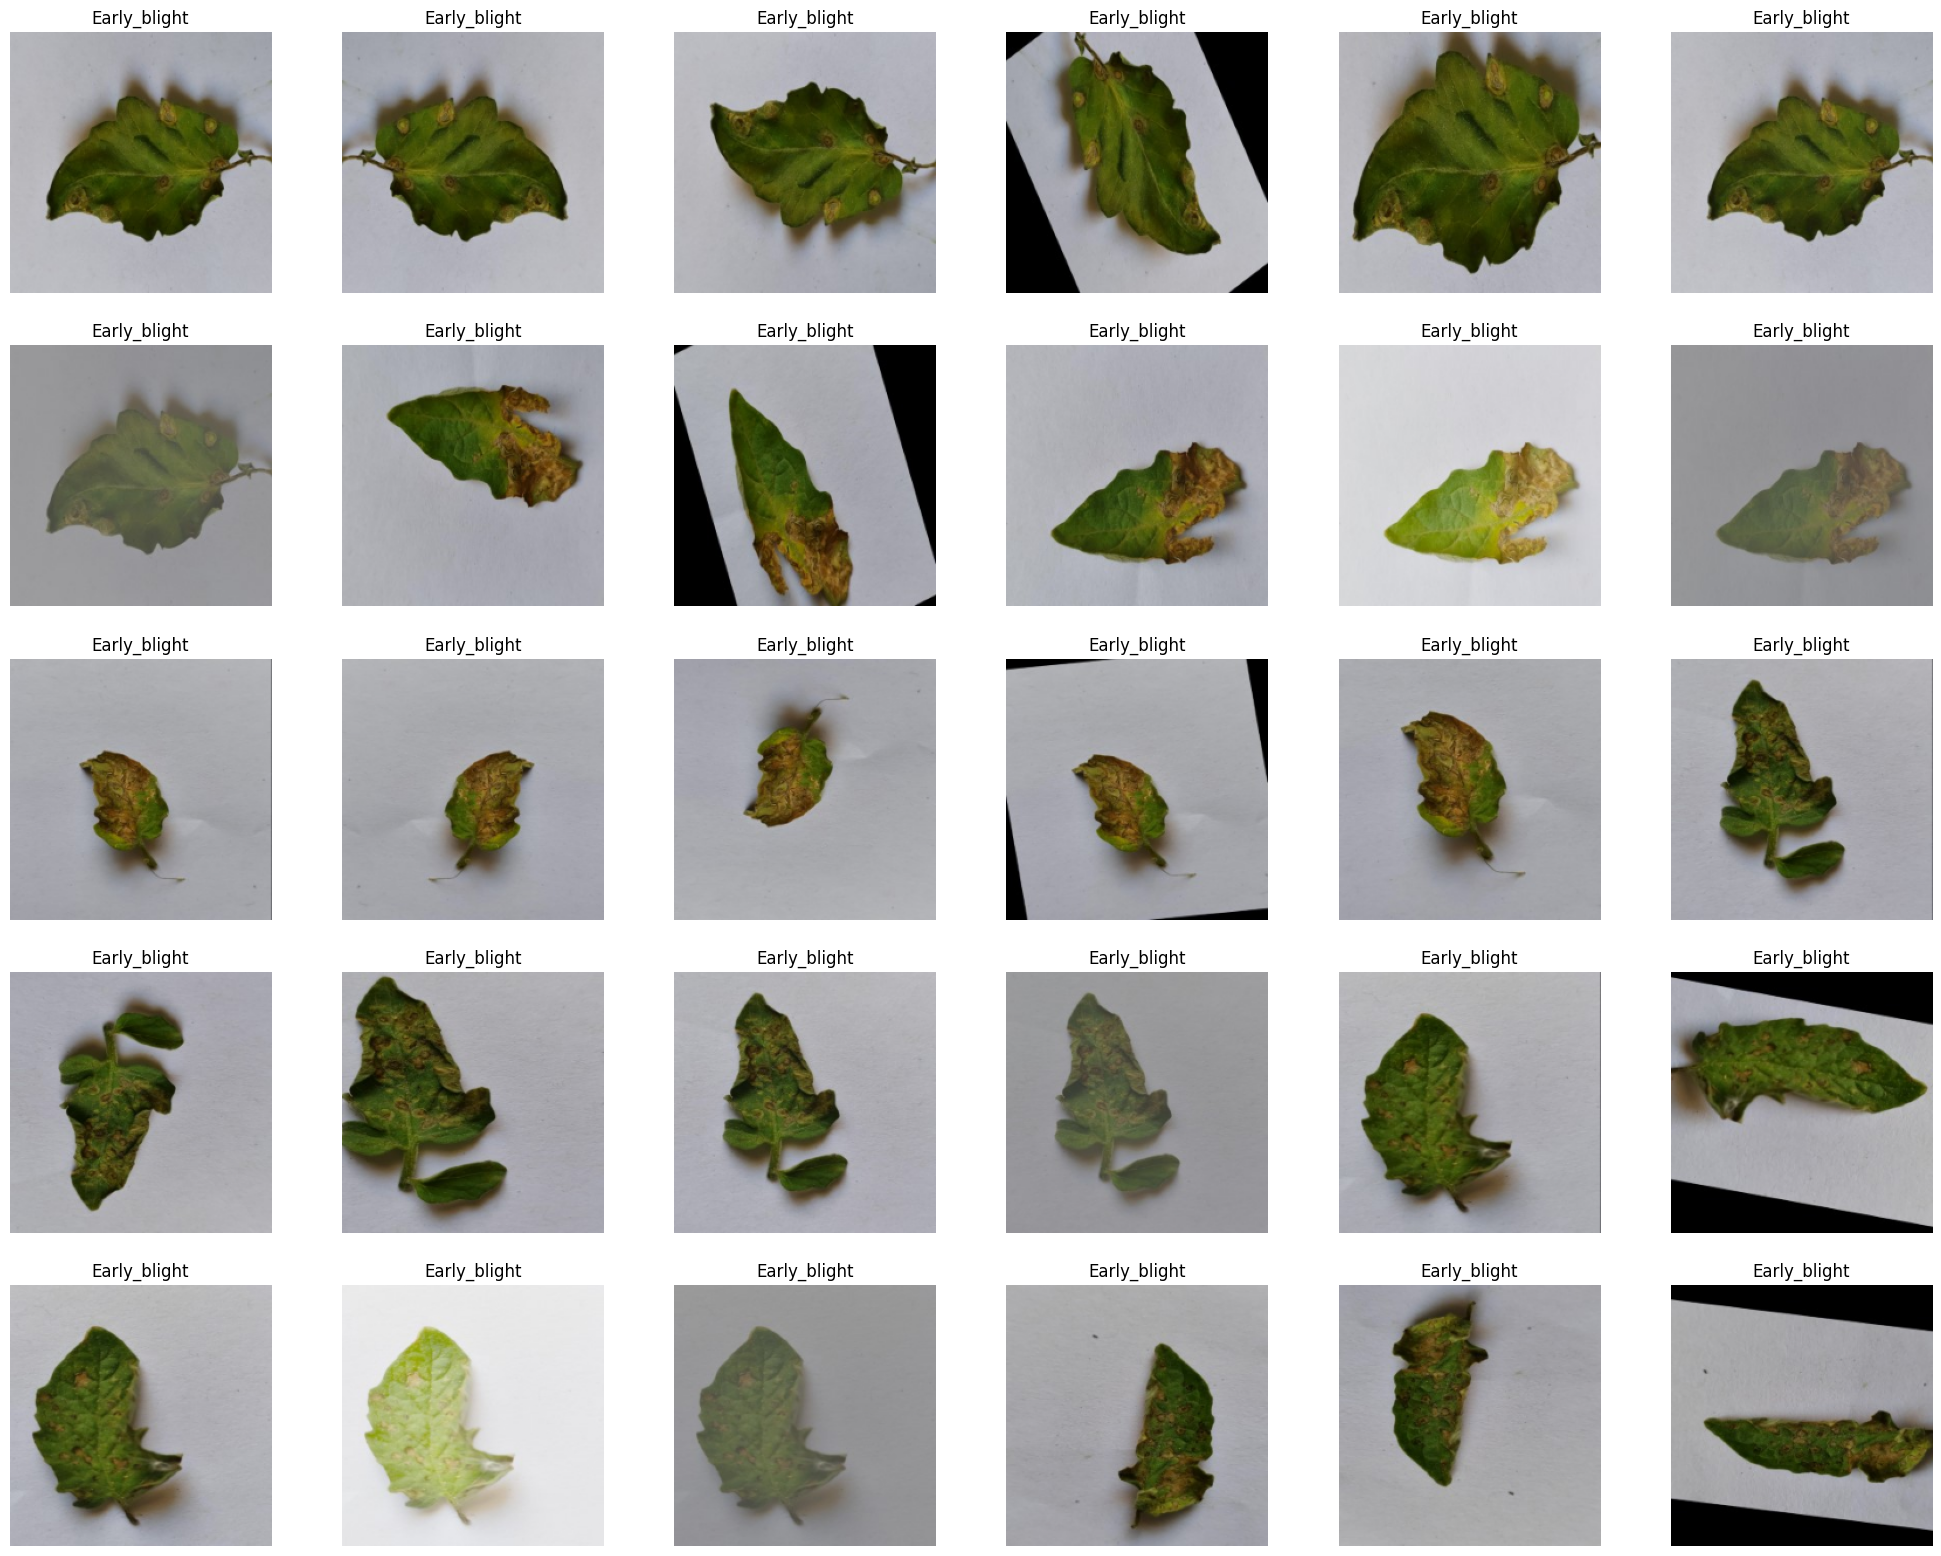

In [30]:
plt.figure(figsize=(25,40))
for i in range(30):
    plt.subplot(10,6,i+1)
    plt.imshow(X_train_balanced[i])
    plt.title(class_labels[y_train_balanced[i]])
    plt.axis("off")

In [31]:
print("X_train_balanced: ", X_train_balanced.shape)
print("y_train_balanced: ", y_train_balanced.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)

X_train_balanced:  (4252, 224, 224, 3)
y_train_balanced:  (4252,)
X_test:  (461, 224, 224, 3)
y_test:  (461,)
X_val:  (902, 224, 224, 3)
y_val:  (902,)


In [32]:
img_shape = X_train_balanced.shape[1:]
img_shape

(224, 224, 3)

**Training Section**

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152, MobileNet, VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
#data_augmentation = keras.Sequential([

#    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3, seed=42, fill_value=0.0),
    #tf.keras.layers.experimental.preprocessing.RandomContrast(.9,  seed=42),
#    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3),width_factor=(-0.2, 0.3),fill_mode='reflect', interpolation='bilinear',seed=42,fill_value=0.0),
#    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224,3))
])

#resizing_and_rescaling = tf.keras.Sequential([
 #   tf.keras.layers.experimental.preprocessing.Resizing(224,224),
  #  tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
#])

**Importing MobileNet**

In [35]:
base_model = tf.keras.applications.MobileNet(input_shape=img_shape,
                                               include_top=False, 
                                               weights='imagenet')

In [36]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [37]:
base_model.trainable = True

In [38]:
n_classes = 8
mobile = tf.keras.Sequential([
  base_model,
  #data_augmentation,
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(n_classes, activation='softmax')
])

In [39]:
mobile.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 8200      
Total params: 3,237,064
Trainable params: 3,215,176
Non-trainable params: 21,888
_________________________________________________________________


In [40]:
mobile.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(
                          from_logits=False,
                          name='sparse_categorical_crossentropy'),
             metrics = ['accuracy'])

In [41]:
import time
start = time.time()

history = mobile.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), batch_size=16, epochs=50)

end = time.time()
total_time = end - start

Epoch 1/50
266/266 [==============================] - 32s 78ms/step - loss: 0.8721 - accuracy: 0.7258 - val_loss: 3.2814 - val_accuracy: 0.4678
Epoch 2/50
266/266 [==============================] - 19s 73ms/step - loss: 0.4364 - accuracy: 0.8521 - val_loss: 0.8865 - val_accuracy: 0.7373
Epoch 3/50
266/266 [==============================] - 21s 79ms/step - loss: 0.3036 - accuracy: 0.8928 - val_loss: 0.9451 - val_accuracy: 0.7195
Epoch 4/50
266/266 [==============================] - 23s 86ms/step - loss: 0.2614 - accuracy: 0.9118 - val_loss: 1.4381 - val_accuracy: 0.6242
Epoch 5/50
266/266 [==============================] - 22s 83ms/step - loss: 0.2255 - accuracy: 0.9240 - val_loss: 1.1674 - val_accuracy: 0.7239
Epoch 6/50
266/266 [==============================] - 22s 83ms/step - loss: 0.1641 - accuracy: 0.9429 - val_loss: 0.9232 - val_accuracy: 0.7406
Epoch 7/50
266/266 [==============================] - 22s 83ms/step - loss: 0.1815 - accuracy: 0.9381 - val_loss: 1.4090 - val_accuracy:

In [42]:
print(f"Total time taken for fitting: {total_time:.2f} sec")

Total time taken for fitting: 1122.74 sec


In [43]:
mobile.evaluate(X_test, y_test)

15/15 [==============================] - 1s 44ms/step - loss: 0.4542 - accuracy: 0.8872


[0.4542008340358734, 0.887201726436615]

Text(0.5, 1.0, 'Training and Validation Accuracy')

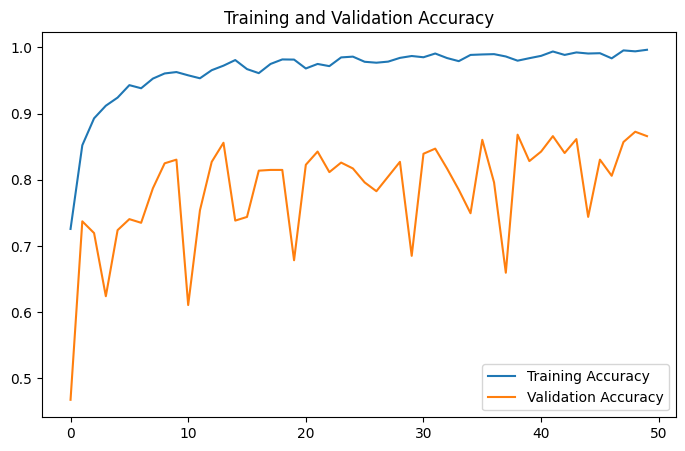

In [44]:
epochs =50

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

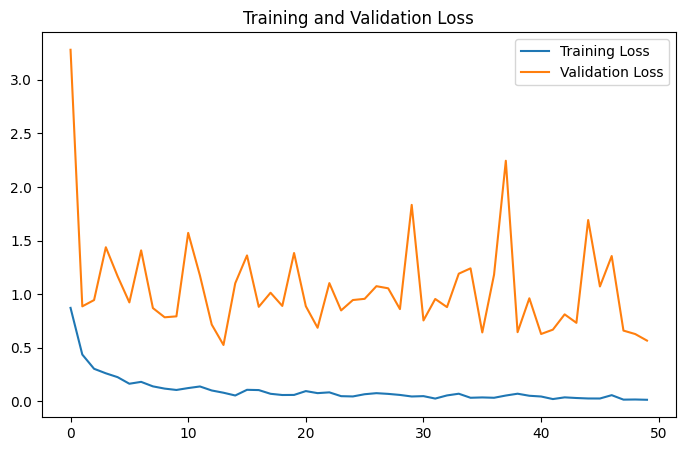

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
# For TensorFlow/Keras models
mobile.save("mobileNet_finetune.h5")
print("Model saved to mobileNet_finetune.h5")


Model saved to mobileNet_finetune.h5


In [47]:
from tensorflow.keras.models import load_model

# Load the  model
loaded_mobileNet = load_model("mobileNet_finetune.h5")
print("Model loaded from mobileNet_finetune.h5")

Model loaded from mobileNet_finetune.h5


In [48]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

y_pred = loaded_mobileNet.predict(X_test) #### 3-dimentional

y_pred1 = np.array(list(map(lambda x: np.argmax(x), y_pred))) #pred_prob = np.argmax(y_pred, axis=1) ## 1-dimentional
    
report = classification_report(y_test, y_pred1)
    
print(report)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        50
           1       0.72      0.82      0.77        22
           2       0.91      0.87      0.89        92
           3       0.92      0.91      0.92       104
           4       0.96      0.97      0.96        95
           5       0.92      0.95      0.93        37
           6       1.00      0.75      0.86         8
           7       0.72      0.87      0.79        53

    accuracy                           0.89       461
   macro avg       0.88      0.86      0.87       461
weighted avg       0.89      0.89      0.89       461



In [52]:
from sklearn.metrics import RocCurveDisplay, recall_score, f1_score, precision_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
precision_per_class = precision_score(y_test, y_pred1, average=None)
f1_per_class = f1_score(y_test, y_pred1, average=None)

# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 88.72%
Precision: 89.31%
Recall: 88.72%
F1 Score: 88.79%
Precision per Class: [90.24, 72.0, 90.91, 92.23, 95.83, 92.11, 100.0, 71.88]%
F1 Score per Class: [81.32, 76.6, 88.89, 91.79, 96.34, 93.33, 85.71, 78.63]%


[[37  1  3  1  1  2  0  5]
 [ 1 18  0  3  0  0  0  0]
 [ 1  0 80  2  1  0  0  8]
 [ 0  6  0 95  0  0  0  3]
 [ 0  0  0  1 92  1  0  1]
 [ 0  0  1  0  0 35  0  1]
 [ 0  0  1  0  1  0  6  0]
 [ 2  0  3  1  1  0  0 46]]


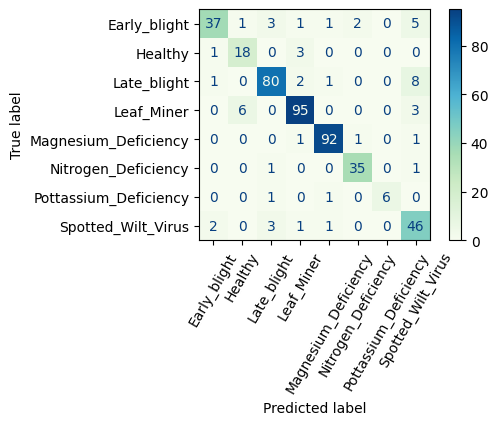

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)
print(cm)


display_cm = ConfusionMatrixDisplay(cm, display_labels=class_labels)
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

In [54]:
from sklearn.metrics import roc_curve, auc
import sklearn

sklearn.metrics.roc_auc_score(y_test, y_pred, multi_class='ovr')

0.989049173283743

In [55]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred1)

0.864677358352103

In [56]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

0.45420087462556524

In [57]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

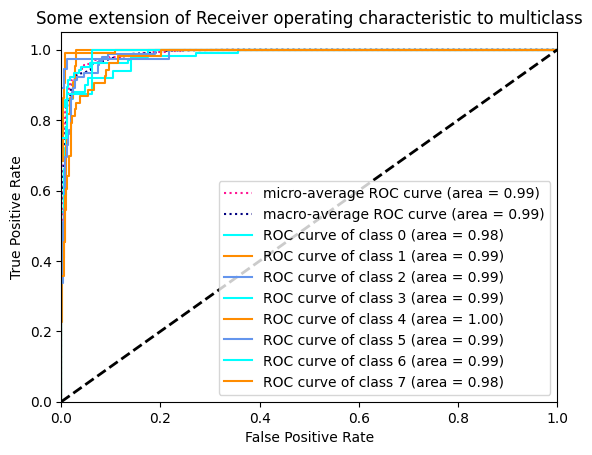

In [58]:
n_classes=8
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



##### Plot all ROC curves ######


plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [1]:
# Load the subset from the file
import numpy as np
data = np.load('Tomato_test.npz')
X_test = data['X_test']
y_test = data['y_test']

In [2]:
from tensorflow.keras.models import load_model

# Load the  model
loaded_mobileNet = load_model("mobileNet_finetune.h5")
print("Model loaded from mobileNet_finetune.h5")

Model loaded from mobileNet_finetune.h5


In [3]:
loaded_mobileNet.evaluate(X_test, y_test)

15/15 [==============================] - 6s 48ms/step - loss: 0.4542 - accuracy: 0.8872


[0.4542008340358734, 0.887201726436615]


Image Index: 299


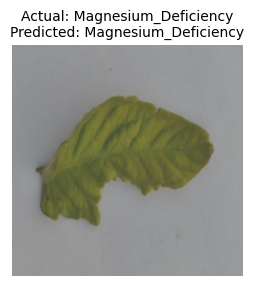


Image Index: 422


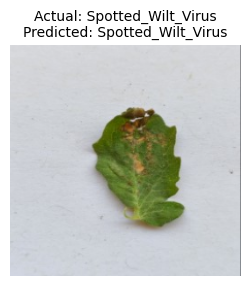


Image Index: 388


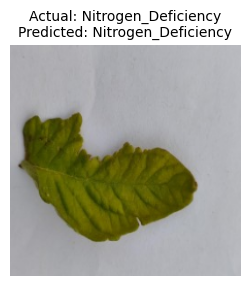


Image Index: 358


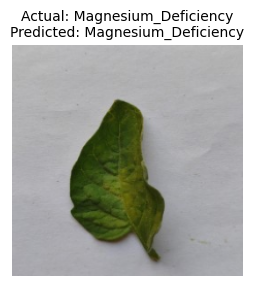


Image Index: 80


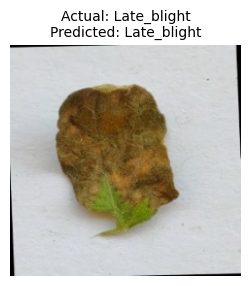


Image Index: 347


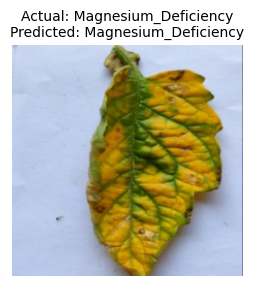


Image Index: 0


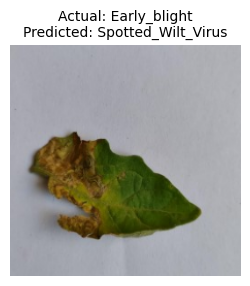


Image Index: 380


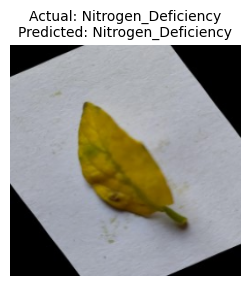


Image Index: 187


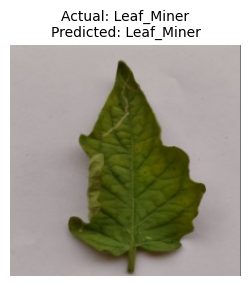


Image Index: 453


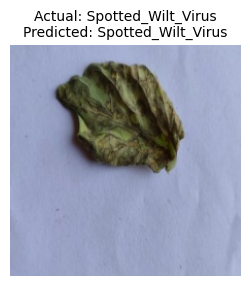


Image Index: 271


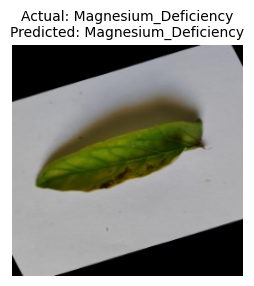


Image Index: 215


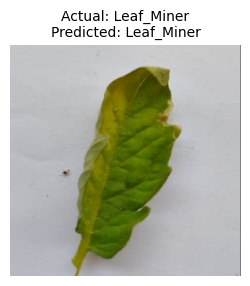


Image Index: 444


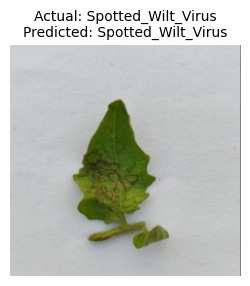


Image Index: 42


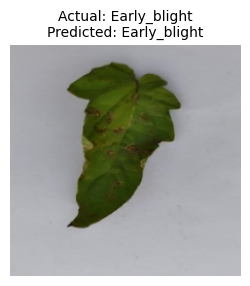


Image Index: 279


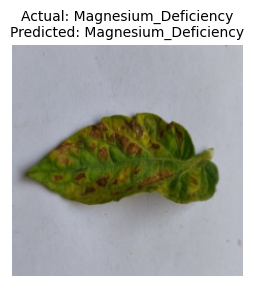


Image Index: 165


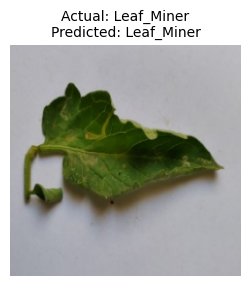


Image Index: 64


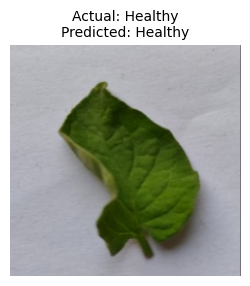


Image Index: 72


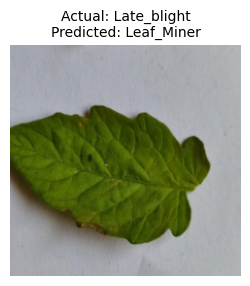


Image Index: 327


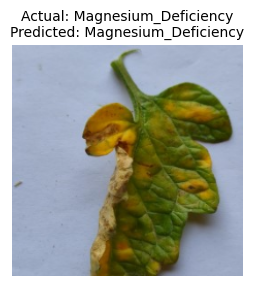


Image Index: 97


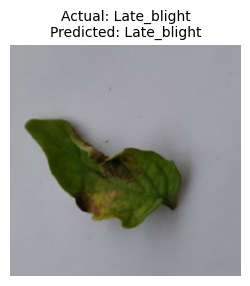

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Select 20 random indices from the test set
random_indices = random.sample(range(len(X_test)), 20)

class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']

# Loop through the randomly selected indices
for index in random_indices:
    # Select the test image and its corresponding actual label
    test_image = X_test[index]
    actual_label_index = y_test[index]  # Assuming y_test contains the actual labels as indices

    # Add a batch dimension (required by the CNN model)
    test_image_batch = np.expand_dims(test_image, axis=0)  # Shape becomes (1, 224, 224, 3)

    # Predict the class probabilities for the image
    predictions = loaded_mobileNet.predict(test_image_batch)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the actual and predicted class labels
    actual_label = class_labels[actual_label_index]
    predicted_label = class_labels[predicted_class_index]

    # Display the image with Matplotlib
    plt.figure(figsize=(3, 3))  # Set figure size

    # If the image is normalized, scale it back to the range [0, 255] for display
    if test_image.max() <= 1.0:
        display_image = test_image * 255  # Rescale to [0, 255]
    else:
        display_image = test_image  # If already in [0, 255], keep it as is

    # Display the image
    print()
    print(f"Image Index: {index}")
    plt.imshow(display_image.astype('uint8'))  # Convert to uint8 for correct display
    plt.axis('off')  # Turn off axis
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)  # Add title
    plt.show()


In [ ]:
# Accessing the base_model (MobileNet)
base_model = loaded_mobileNet.layers[0]  # The first layer in the Sequential model is MobileNet

In [ ]:
# If you want to see the layers of the base model:
base_model.summary()

# Access the last layer in the base model (before the classifier layers)
last_conv_layer = base_model.get_layer('conv_pw_13_relu ')  # Change this to the correct layer name


In [ ]:
last_conv_layer = base_model.get_layer('conv_pw_13_relu')  
last_conv_layer

In [ ]:
# Load the subset from the file
import numpy as np
data = np.load('Tomato_test.npz')
X_test = data['X_test']
y_test = data['y_test']

loaded_mobileNet.evaluate(X_test, y_test)

In [66]:
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Assuming loaded_mobileNet is already loaded as a MobileNet model
def grad_cam(loaded_mobileNet, img_array, class_idx):
    # Ensure you have the correct last convolutional layer name
    last_conv_layer = base_model.get_layer('conv_dw_13')  # Use your actual layer name

    # Create a new model that outputs the activations of the last convolutional layer and the final output
    grad_model = Model(inputs=loaded_mobileNet.input, 
                       outputs=[last_conv_layer.output, loaded_mobileNet.output])

    with tf.GradientTape() as tape:
        # Forward pass: Get activations and predictions
        conv_output, predictions = grad_model(img_array)
        
        # Compute the class-wise loss
        loss = predictions[:, class_idx]  # Loss for the class you are interested in
        
    # Compute gradients of the loss with respect to the activations of the last convolutional layer
    grads = tape.gradient(loss, conv_output)
    
    # Pool the gradients across all axes
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Access the output of the convolutional layer
    conv_output = conv_output[0]  # We assume a single image batch

    # Multiply the pooled gradients with the activations
    cam = np.dot(conv_output, pooled_grads.numpy())
    
    # Apply ReLU to the CAM to keep only positive values
    cam = np.maximum(cam, 0)
    
    # Resize the CAM to match the input image size
    cam = cv2.resize(cam, (img_array.shape[2], img_array.shape[1]))  # Resize to match image dimensions

    return cam


In [68]:
# Loop through the first 10 images in the test set
for i in range(10):  # Only the first 10 images
    img = X_test[i]  # Assuming X_test is your test set
    img_input = np.expand_dims(img, axis=0)  # Add batch dimension
    img_input = tf.keras.applications.mobilenet.preprocess_input(img_input)  # Preprocess image for MobileNet
    
    # Predict the class (you can also use the model's prediction to get the class index)
    class_idx = np.argmax(base_model.predict(img_input))
    
    # Generate Grad-CAM for the image
    cam = grad_cam(loaded_mobileNet, img_input, class_idx)
    
    # Plot the original image and overlay Grad-CAM
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.imshow(cam, cmap='jet', alpha=0.5)  # Overlay the CAM heatmap
    plt.colorbar()
    plt.title(f"Grad-CAM for Image {i + 1} (Class {class_idx})")
    plt.show()

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "conv1". The following previous layers were accessed without issue: []